# Load the libraries

In [1]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns  
from scipy.stats import pointbiserialr
import scipy.stats as stats
 


# Load the datasets

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_helper_data = pd.read_csv("train_helper.csv")
test_helper_data = pd.read_csv("test_helper.csv")



## About dataset

In [3]:
train_data.shape, test_data.shape

((233633, 14), (215852, 13))

In [4]:
train_helper_data.shape, test_helper_data.shape

((1231200, 10), (1160950, 10))

In [5]:
train_data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN


In [6]:
test_data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,CUID6660,TID198043,EID908838,4154.125,13-08-2020 08:41,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
1,CUID6660,TID312736,EID502971,8350.000,17-08-2020 04:13,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
2,CUID6660,TID308818,EID231193,20.875,11-08-2020 01:40,363981,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
3,CUID6660,TID321252,EID1124129,20457.500,30-08-2020 22:11,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
4,CUID6660,TID420788,EID908838,4154.125,13-08-2020 08:40,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00


In [7]:
train_helper_data.head(5)

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.50
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20,400.06


In [209]:
test_helper_data.head(5)

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID3258,EID1709316,B170291,A,2018-01-16 13:55:17,168.160.152.82,875,498795,94.00,NaN
1,CUID2835,EID339299,B170291,A,2018-01-16 13:55:18,121.122.132.145,875,33514,129.25,NaN
2,CUID1750,EID342176,B170291,A,2018-01-16 13:56:23,183.207.164.149,875,2136427,98.70,NaN
3,CUID103,EID1507511,B4995,A,2018-01-16 13:56:37,123.143.40.203,875,1730685,96.35,NaN
4,CUID1750,EID342176,B1827073,B,2018-01-16 13:56:46,183.207.164.149,875,2136427,NaN,63.91


In [8]:
d = dict(train_helper_data.iloc[0])

In [9]:
e = dict(test_helper_data.iloc[0])

In [11]:
e

{'V1': 'CUID3258',
 'V3': 'EID1709316',
 'V14': 'B170291',
 'V15': 'A',
 'V16': '2018-01-16 13:55:17',
 'V17': '168.160.152.82',
 'V18': 875,
 'V19': 498795,
 'V20': 94.0,
 'V21': nan}

In [210]:
unique_values = train_data['V1'].unique()
print(len((unique_values)))

3684


## Now we know that in total of 2 lakh+ trasactions only 3684 are unique person and rest are their transaction details

### Function for Number of unique values, unique values , Missing value percentage and Category of column 

In [211]:
def column_info(train_data, features):
    categorical_features = []
    for feature in features:
        unique_values = train_data[feature].unique()
        missing_percentage = train_data[feature].isnull().mean() * 100
        num_unique_values = len(unique_values)
        is_categorical = train_data[feature].dtype == 'object' or train_data[feature].nunique() < 20

        print(f"Column: '{feature}'")
        print(f"Number of unique values: {num_unique_values}")
        print("Unique values:")
        print(unique_values)
        print(f"Missing value percentage: {missing_percentage:.2f}%")
        print(f"Categorical: {'Yes' if is_categorical else 'No'}")
        print("-----------------------------------------------------------------------------------------")

        if is_categorical:
            categorical_features.append(feature)

    return categorical_features

# Example usage:
# Assuming you have a DataFrame named 'train_data' and a list of feature names named 'features'
features = train_data.columns
categorical_features = column_info(train_data, features)


Column: 'V1'
Number of unique values: 3684
Unique values:
['CUID1872' 'CUID5533' 'CUID5278' ... 'CUID5687' 'CUID6896' 'CUID4557']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V2'
Number of unique values: 233633
Unique values:
['TID229526' 'TID244499' 'TID311877' ... 'TID318682' 'TID9480' 'TID158744']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V3'
Number of unique values: 206627
Unique values:
['EID2062082' 'EID1459012' 'EID0' ... 'EID1776806' 'EID631635'
 'EID1368225']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V4'
Number of unique values: 16207
Unique values:
[ 485.69445  393.452    375.75    ...   58.84245   82.7151  2228.57325]
Missing value percentage: 0.00%
Categorical: No


### Observation

1) Only V13 column has missing values 0.8% 
2) V1, V2 and V3 are Id related columns, we can drop these
3) V4 is looks like Transaction Amount feature and also it have No null values
4) V5 and V13 are timestamp columns have time.
5) ['V1','V2','V3','V5','V7','V8','V9','V10','V11','V12','Target','V13'] these all are categorical features
6) 12 out of 14 are categorical features
7) V11 has only 1 value so we can drop it
8) Target feature has two unique values 0 and 1 , 0 for non fraud and 1 for fraud
9) V10, V9, V8, V12 are like id columns so these can also be drop

# Droping columns by intuition

In [212]:
cols_to_remove_train = ["V3", "V2", "V7","V8","V9","V10", "V11","V12"]
train_data.drop(cols_to_remove_train, axis=1, inplace=True)

In [213]:
train_data

,V1,V4,V5,V6,Target,V13
0,CUID1872,485.69445,2020-03-20 22:51:30,376474,0,2020-03-21 00:00:00
1,CUID5533,393.45200,2020-04-28 07:17:12,33227,0,2020-04-28 00:00:00
2,CUID5278,375.75000,2020-08-15 04:11:43,0,0,NaN
3,CUID24,6.97225,2020-06-26 01:11:42,0,0,NaN
4,CUID449,16.70000,2020-09-15 10:11:06,0,0,NaN
...,...,...,...,...,...,...
233628,CUID449,41.75000,2020-09-06 03:42:03,391083,0,2019-02-03 00:00:00
233629,CUID449,83.50000,2020-08-19 04:43:01,391083,0,2019-02-03 00:00:00
233630,CUID449,41.75000,2020-08-26 05:51:17,391083,0,2019-02-03 00:00:00
233631,CUID449,167.00000,2020-04-15 20:35:21,53,0,2020-04-16 00:00:00


## Now we find relation of these features with Target column and understand the data

#  Target

In [214]:
# Count the occurrences of each unique value in the 'Target' column of the train_data dataframe.
train_data['Target'].value_counts()

0    232343
1      1290
Name: Target, dtype: int64

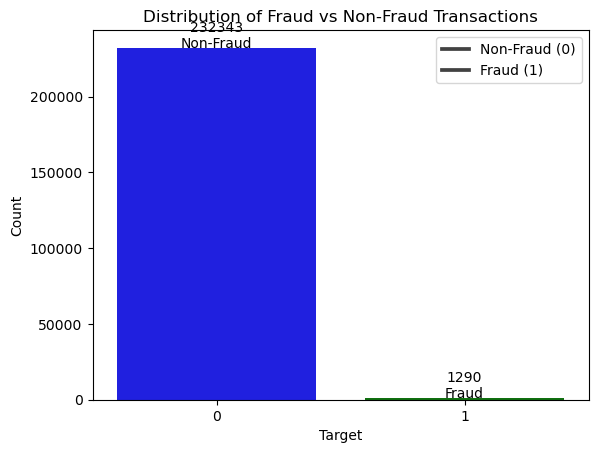

In [215]:
value_counts = train_data['Target'].value_counts()
colors = ['blue', 'green']
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 10, f"{count}\n{'Non-Fraud' if value_counts.index[i] == 0 else 'Fraud'}", ha='center')
plt.legend(['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()


**The value 0 appears 232,343 times.

**The value 1 appears 1,290 times.

**This indicates that out of all the transactions in the DataFrame, 

**232,343 transactions are labeled as non-fraud (Target = 0) and

**1,290 transactions are labeled as fraud (Target = 1)

# V4

In [216]:
train_data['V4'].head(4)

0    485.69445
1    393.45200
2    375.75000
3      6.97225
Name: V4, dtype: float64

In [217]:
train_data['V4'].describe()

count    233633.000000
mean        266.360390
std        1338.657212
min           0.008350
25%          12.525000
50%          33.400000
75%         115.230000
max       41750.000000
Name: V4, dtype: float64

### V4 column has continuous values and Target column has binary classfication so to find the relation between these two we can do  
## Box plot                  and       Two-sample t-test

# Box Plot

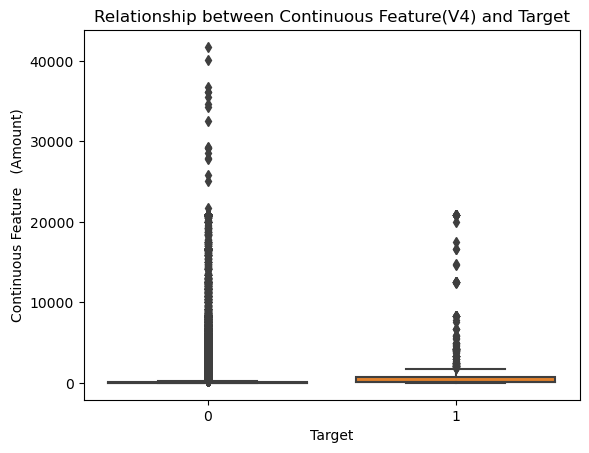

In [218]:
sns.boxplot(x='Target', y='V4', data=train_data)
plt.xlabel('Target')
plt.ylabel('Continuous Feature   (Amount)')
plt.title('Relationship between Continuous Feature(V4) and Target')
plt.show()

### Observation
1) Range of fraud transaction is nearly 20,000
2) Normal transactions are lie more than 40,000 but major transactions are upto 20,000

# V4 is continuous and Target is categorical so we apply statistical tests 

# Point-Biserial Correlation

## Assumptions for Point-Biserial Correlation

### 1)Linearity                        2)Normality                                          3)Homoscedasticity


In [219]:
V4 =  train_data["V4"]
Target = train_data["Target"]
assumption_passed_count = 0

# Assumption 2: Normality
normality_p_value = stats.normaltest(V4).pvalue
if normality_p_value > 0.05:
    print("Assumption 2 (Normality): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 2 (Normality): Failed")

# Assumption 3: Homoscedasticity
group_0 = V4[Target == 0]
group_1 = V4[Target == 1]
homoscedasticity_p_value = stats.levene(group_0, group_1).pvalue
if homoscedasticity_p_value > 0.05:
    print("Assumption 4 (Homoscedasticity): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 4 (Homoscedasticity): Failed")

print("Number of assumptions passed:", assumption_passed_count)
if assumption_passed_count == 3:
    print("All assumptions passed. Proceed with Point-Biserial Correlation analysis.")
else:
    print("Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.")


Assumption 2 (Normality): Failed
Assumption 4 (Homoscedasticity): Failed
Number of assumptions passed: 0
Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.


### assumptions for Point-Biserial Correlation are failed so we cann't use this test

### we try for alternative analysis methods or consider transforming the data to meet the assumptions

Data Transformation: Another approach is to transform the data to meet the assumptions. 

For normality, we can try applying transformations such as logarithmic, square root, or Box-Cox transformations to achieve a more symmetrical distribution. 

Similarly, for heteroscedasticity, we can apply transformations such as the reciprocal or logarithmic transformations to stabilize the variance across the groups. 

## Applying transformation to V4 using logarithmic transformation

Assumption 2 (Normality): Failed
Assumption 3 (Homoscedasticity): Passed
Number of assumptions passed: 1
Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.


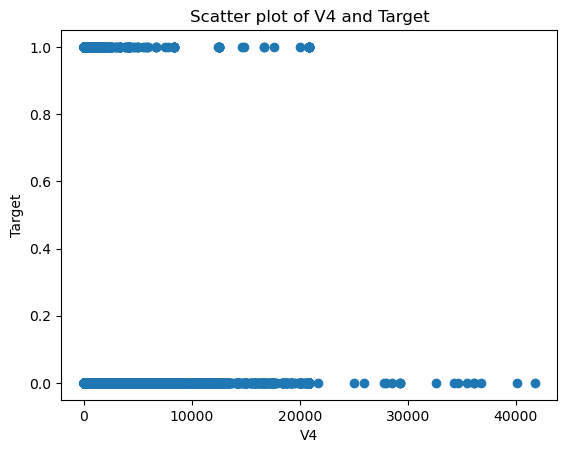

In [220]:
V4 = train_data["V4"]
Target = train_data["Target"]
assumption_passed_count = 0

# Assumption 1: Linearity 
plt.scatter(V4, Target)
plt.xlabel('V4')
plt.ylabel('Target')
plt.title('Scatter plot of V4 and Target')
# plt.show()

# Assumption 2: Normality
normality_p_value = stats.normaltest(V4).pvalue
if normality_p_value > 0.05:
    print("Assumption 2 (Normality): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 2 (Normality): Failed")

# Applying transformation to V4 using logarithmic transformation
V4_transformed = np.log(V4)

# Assumption 3: Homoscedasticity
group_0 = V4_transformed[Target == 0]
group_1 = V4_transformed[Target == 1]
homoscedasticity_p_value = stats.levene(group_0, group_1).pvalue
if homoscedasticity_p_value > 0.05:
    print("Assumption 3 (Homoscedasticity): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 3 (Homoscedasticity): Failed")

print("Number of assumptions passed:", assumption_passed_count)

if assumption_passed_count >= 2:
    print("Sufficient assumptions passed. Proceed with Point-Biserial Correlation analysis.")
else:
    print("Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.")


### Only one assumption passed  (Homoscedasticity): Passed but we need all assumptions should passed

## Applying transformation to V4 using Square Root Transformation

In [221]:
V4 = train_data["V4"]
Target = train_data["Target"]
assumption_passed_count = 0


# Assumption 2: Normality
# Applying transformation to V4 using Square Root Transformation
V4_transformed = np.sqrt(V4)
normality_p_value = stats.normaltest(V4_transformed).pvalue
if normality_p_value > 0.05:
    print("Assumption 2 (Normality): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 2 (Normality): Failed")

# Assumption 3: Homoscedasticity
group_0 = V4_transformed[Target == 0]
group_1 = V4_transformed[Target == 1]
homoscedasticity_p_value = stats.levene(group_0, group_1).pvalue
if homoscedasticity_p_value > 0.05:
    print("Assumption 3 (Homoscedasticity): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 3 (Homoscedasticity): Failed")

print("Number of assumptions passed:", assumption_passed_count)

if assumption_passed_count >= 2:
    print("Sufficient assumptions passed. Proceed with Point-Biserial Correlation analysis.")
else:
    print("Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.")


Assumption 2 (Normality): Failed
Assumption 3 (Homoscedasticity): Failed
Number of assumptions passed: 0
Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.


## Now all  assumption failed but we need all assumptions should passed

##  Applying Yeo-Johnson transformation to V4

In [222]:
V4 = train_data["V4"]
Target = train_data["Target"]
assumption_passed_count = 0


# Assumption 2: Normality
# Applying Yeo-Johnson transformation to V4
V4_transformed, lambda_ = stats.yeojohnson(V4)
normality_p_value = stats.normaltest(V4_transformed).pvalue
if normality_p_value > 0.05:
    print("Assumption 2 (Normality): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 2 (Normality): Failed")

# Assumption 3: Homoscedasticity
group_0 = V4_transformed[Target == 0]
group_1 = V4_transformed[Target == 1]
homoscedasticity_p_value = stats.levene(group_0, group_1).pvalue
if homoscedasticity_p_value > 0.05:
    print("Assumption 3 (Homoscedasticity): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 3 (Homoscedasticity): Failed")

print("Number of assumptions passed:", assumption_passed_count)

if assumption_passed_count >= 2:
    print("Sufficient assumptions passed. Proceed with Point-Biserial Correlation analysis.")
else:
    print("Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.")


Assumption 2 (Normality): Failed
Assumption 3 (Homoscedasticity): Failed
Number of assumptions passed: 0
Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.


## Now all  assumption failed but we need all assumptions should passed

## Box-Cox transformation:

In [223]:
V4 = train_data["V4"]
Target = train_data["Target"]
assumption_passed_count = 0

# Assumption 2: Normality
# Applying Box-Cox transformation to V4
V4_transformed, lambda_ = stats.boxcox(V4 + 1)  # Adding 1 to handle zero and negative values
normality_p_value = stats.normaltest(V4_transformed).pvalue
if normality_p_value > 0.05:
    print("Assumption 2 (Normality): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 2 (Normality): Failed")

# Assumption 3: Homoscedasticity
group_0 = V4_transformed[Target == 0]
group_1 = V4_transformed[Target == 1]
homoscedasticity_p_value = stats.levene(group_0, group_1).pvalue
if homoscedasticity_p_value > 0.05:
    print("Assumption 3 (Homoscedasticity): Passed")
    assumption_passed_count += 1
else:
    print("Assumption 3 (Homoscedasticity): Failed")

print("Number of assumptions passed:", assumption_passed_count)

if assumption_passed_count >= 2:
    print("Sufficient assumptions passed. Proceed with Point-Biserial Correlation analysis.")
else:
    print("Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.")


Assumption 2 (Normality): Failed
Assumption 3 (Homoscedasticity): Failed
Number of assumptions passed: 0
Some assumptions failed. Consider the results carefully before proceeding with Point-Biserial Correlation analysis.


###  Box-Cox transformation failed to meet the assumptions, it can be challenging to proceed with the Point-Biserial Correlation analysis using the transformed V4 variable.

##  biserial correlation coefficient

biserial correlation coefficient is a measure of the strength and direction of the relationship between a continuous variable (in this case, V4) and a binary variable (the target variable).

In [224]:
V4 = train_data["V4"]
Target = train_data["Target"]

# Calculate biserial correlation coefficient
biserial_corr, p_value = stats.pointbiserialr(V4, Target)

print("Biserial Correlation Coefficient:", biserial_corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("The biserial correlation is statistically significant.")
else:
    print("The biserial correlation is not statistically significant.")


Biserial Correlation Coefficient: 0.03926276765653985
P-value: 2.264535162097629e-80
The biserial correlation is statistically significant.


In [225]:
import numpy as np
import scipy.stats as stats

# Assume x and y are the variables of interest
x = train_data["V4"]
y = train_data["Target"]

# Assumption 1: Monotonic relationship
rho, p_value = stats.spearmanr(x, y)
if p_value < 0.05:
    print("Assumption 1 (Monotonic relationship): Passed")
else:
    print("Assumption 1 (Monotonic relationship): Failed")

z_scores = stats.zscore(x)
outliers = np.where(np.abs(z_scores) > 3)[0]
if len(outliers) == 0:
    print("Assumption 4 (No outliers): Passed")
else:
    print("Assumption 4 (No outliers): Failed")


Assumption 1 (Monotonic relationship): Passed
Assumption 4 (No outliers): Failed


### t test

In [226]:
import numpy as np
import scipy.stats as stats

# Assume you have a continuous independent variable and a dependent categorical variable
continuous_var = train_data["V4"]
dependent_var = train_data["Target"]

 
# Perform the t-test for independent samples
group_0 = np.array(continuous_var)[np.array(dependent_var) == 0]
group_1 = np.array(continuous_var)[np.array(dependent_var) == 1]
t_statistic, p_value = stats.ttest_ind(group_0, group_1)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)



T-statistic: -18.992456869083
P-value: 2.264535161855178e-80


# Observations

The small p-value suggests strong evidence against the null hypothesis, indicating that the observed difference between the two categories is unlikely to have occurred by chance alone. Therefore, you can conclude that there is a statistically significant difference between the means of the two categories in your dependent variable.

 
Overall, based on the t-test results, you can conclude that there is a significant and negative relationship between the V5 variable and the Target variable

# V6

In [227]:
# Display the first 4 rows of the 'V4' column in the train_data dataframe.
train_data['V6'].head(4)

0    376474
1     33227
2         0
3         0
Name: V6, dtype: int64

In [228]:
# Compute descriptive statistics for the 'V4' column in the train_data dataframe.
train_data['V6'].describe()


count    233633.000000
mean     103071.463312
std      143360.598172
min           0.000000
25%       33227.000000
50%       33227.000000
75%       33227.000000
max      447246.000000
Name: V6, dtype: float64

## Box plot

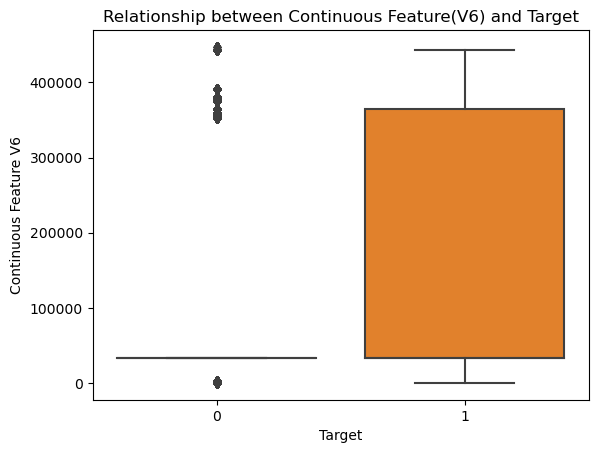

In [229]:
sns.boxplot(x='Target', y='V6', data=train_data)
plt.xlabel('Target')
plt.ylabel('Continuous Feature V6')
plt.title('Relationship between Continuous Feature(V6) and Target')
plt.show()

### Mann-Whitney U test 

In [230]:
import scipy.stats as stats

# Assuming V4 and Target are the variables of interest
V4 = train_data["V4"]
Target = train_data["Target"]

 
is_ordinal = all(isinstance(val, int) for val in Target)

# Print the results
print("Assumption 1 (Independence): Passed")
print("Assumption 2 (Random sampling): Assumed")
if is_ordinal:
    print("Assumption 3 (Ordinal data): Passed")
else:
    print("Assumption 3 (Ordinal data): Failed")

# Proceed with the Mann-Whitney U test if assumptions are satisfied
if is_ordinal:
    mannwhitneyu_statistic, mannwhitneyu_pvalue = stats.mannwhitneyu(V4, Target)
    print("Mann-Whitney U test statistic:", mannwhitneyu_statistic)
    print("Mann-Whitney U test p-value:", mannwhitneyu_pvalue)
else:
    print("Assumptions for the Mann-Whitney U test are not fully satisfied. Consider alternative tests.")


Assumption 1 (Independence): Passed
Assumption 2 (Random sampling): Assumed
Assumption 3 (Ordinal data): Passed
Mann-Whitney U test statistic: 54581508439.0
Mann-Whitney U test p-value: 0.0


## observation

### 
Based on the very small p-value, it can be concluded that there is a statistically significant difference between the two groups (categories 0 and 1) in  dependent variable. 

This suggests that the values of the independent variable (V5) are associated with a significant difference in the distribution of the dependent variable.


a statistically significant difference, it means that the observed difference between two groups or variables is unlikely to have occurred by chance alone. 

In statistical terms, it indicates that the p-value associated with the statistical test is below a predefined significance level (often 0.05 or 0.01), suggesting strong evidence against the null hypothesis.

In the context of your Mann-Whitney U test results, where the p-value is reported as 0.0, it indicates an extremely small probability of observing the observed difference between the two groups (categories 0 and 1) in the Target variable if there were no true difference between the groups in the population. 

The small p-value suggests that the observed difference is likely to be a real effect and not a result of random chance.

Therefore, when we say there is a statistically significant difference, it means that the observed difference is considered statistically meaningful and supports the idea that there is a genuine distinction between the groups being compared.

## V5 (timestamp)

### we have two columns of timestamp(V5 and V13) so we need to understand what they meant and how these related to Target column


is V5 the duration when customer actually goes to make transaction or V13 is the timestamp when fraud occurs like that we have to find answers of these questions 

In [231]:
# Access the 'V5' column in the train_data dataframe.
train_data['V5']

0         2020-03-20 22:51:30
1         2020-04-28 07:17:12
2         2020-08-15 04:11:43
3         2020-06-26 01:11:42
4         2020-09-15 10:11:06
                 ...         
233628    2020-09-06 03:42:03
233629    2020-08-19 04:43:01
233630    2020-08-26 05:51:17
233631    2020-04-15 20:35:21
233632    2020-06-13 21:11:58
Name: V5, Length: 233633, dtype: object

In [232]:
# Convert the relevant columns to datetime data type
train_data['V5'] = pd.to_datetime(train_data['V5'])
train_data['V13'] = pd.to_datetime(train_data['V13'])

# Extract year and day components from column V5
train_data['V5_year'] = train_data['V5'].dt.year
train_data['V5_day'] = train_data['V5'].dt.strftime('%j')

# Extract year and day components from column V13
train_data['V13_year'] = train_data['V13'].dt.year
train_data['V13_day'] = train_data['V13'].dt.strftime('%j')

### 4 new columns added V13	V5_year	V5_day	V13_year	V13_day


In [233]:
train_data

,V1,V4,V5,V6,Target,V13,V5_year,V5_day,V13_year,V13_day
0,CUID1872,485.69445,2020-03-20 22:51:30,376474,0,2020-03-21,2020,080,2020.0,081
1,CUID5533,393.45200,2020-04-28 07:17:12,33227,0,2020-04-28,2020,119,2020.0,119
2,CUID5278,375.75000,2020-08-15 04:11:43,0,0,NaT,2020,228,NaN,NaN
3,CUID24,6.97225,2020-06-26 01:11:42,0,0,NaT,2020,178,NaN,NaN
4,CUID449,16.70000,2020-09-15 10:11:06,0,0,NaT,2020,259,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,41.75000,2020-09-06 03:42:03,391083,0,2019-02-03,2020,250,2019.0,034
233629,CUID449,83.50000,2020-08-19 04:43:01,391083,0,2019-02-03,2020,232,2019.0,034
233630,CUID449,41.75000,2020-08-26 05:51:17,391083,0,2019-02-03,2020,239,2019.0,034
233631,CUID449,167.00000,2020-04-15 20:35:21,53,0,2020-04-16,2020,106,2020.0,107


### Plot Target and V5_day

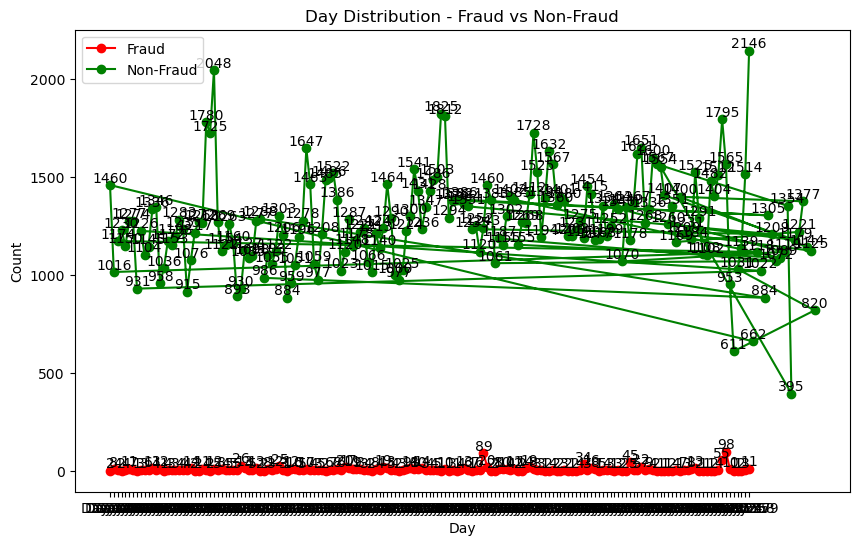

In [234]:
# Count occurrences of each day component for fraud transactions
fraud_day_counts = train_data[train_data['Target'] == 1]['V5_day'].value_counts().sort_index()

# Count occurrences of each day component for non-fraud transactions
non_fraud_day_counts = train_data[train_data['Target'] == 0]['V5_day'].value_counts().sort_index()

# Plot the count of occurrences for each day separately for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
plt.plot(fraud_day_counts.index, fraud_day_counts.values, marker='o', linestyle='-', color='red', label='Fraud')
plt.plot(non_fraud_day_counts.index, non_fraud_day_counts.values, marker='o', linestyle='-', color='green', label='Non-Fraud')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Day Distribution - Fraud vs Non-Fraud')
plt.legend()

# Update x-axis tick labels
day_labels = ['Day {}'.format(day) for day in fraud_day_counts.index]
plt.xticks(fraud_day_counts.index, day_labels)

# Add labels above each data point for fraud transactions
for x, y in zip(fraud_day_counts.index, fraud_day_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Add labels above each data point for non-fraud transactions
for x, y in zip(non_fraud_day_counts.index, non_fraud_day_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()



plot helps to understand the relationship between the day component (represented by V5_day) and the occurrence of fraud or non-fraud transactions. 

It allows for the identification of potential patterns or irregularities that may assist in fraud detection or further analysis. 

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2690637070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2690637070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['Day'] = fraud_transactions['V5'].dt.day
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2690637070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

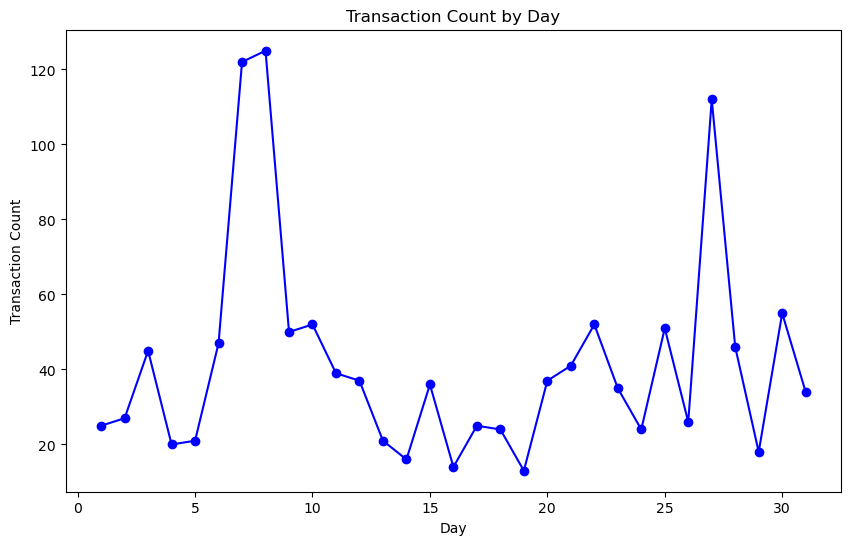

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 1]
fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])

# Extract day and hour components from the timestamp
fraud_transactions['Day'] = fraud_transactions['V5'].dt.day
fraud_transactions['Hour'] = fraud_transactions['V5'].dt.hour

# Plotting patterns within each day
day_counts = fraud_transactions['Day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day')
plt.show()

trends and patterns in fraud transactions based on the day component. to identify any significant variations, spikes, or trends in fraudulent activities across different days. 

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\4277304650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\4277304650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['Day'] = fraud_transactions['V5'].dt.day
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\4277304650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

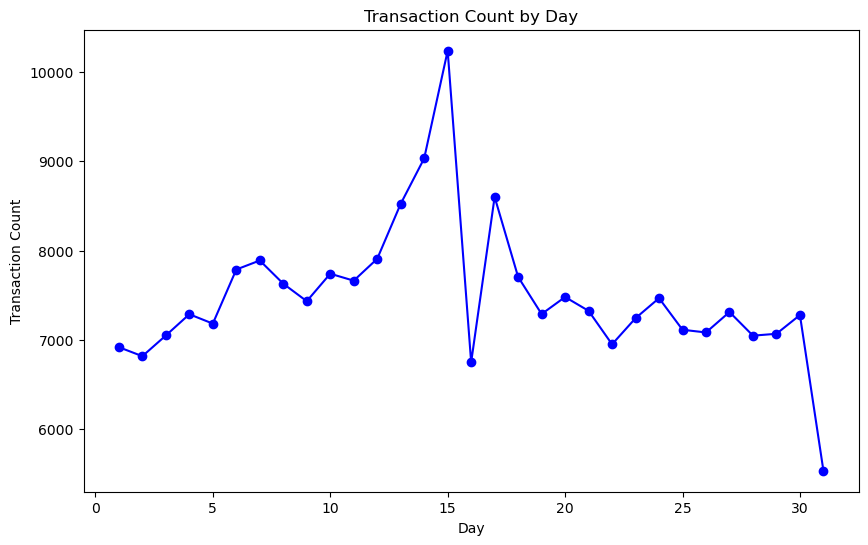

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 0]
fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])

# Extract day and hour components from the timestamp
fraud_transactions['Day'] = fraud_transactions['V5'].dt.day
fraud_transactions['Hour'] = fraud_transactions['V5'].dt.hour

# Plotting patterns within each day
day_counts = fraud_transactions['Day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day')
plt.show()


trends and patterns in non-fraud transactions based on the day component. 

It allows you to identify any significant variations, spikes, or trends in non-fraudulent activities across different days. 

This information can be valuable for understanding the temporal patterns of non-fraud transactions and gaining insights into normal transaction behavior.

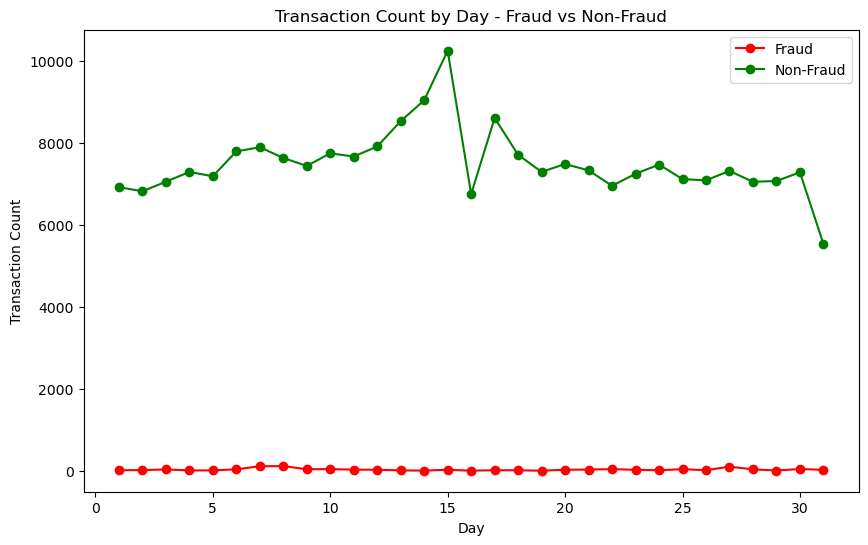

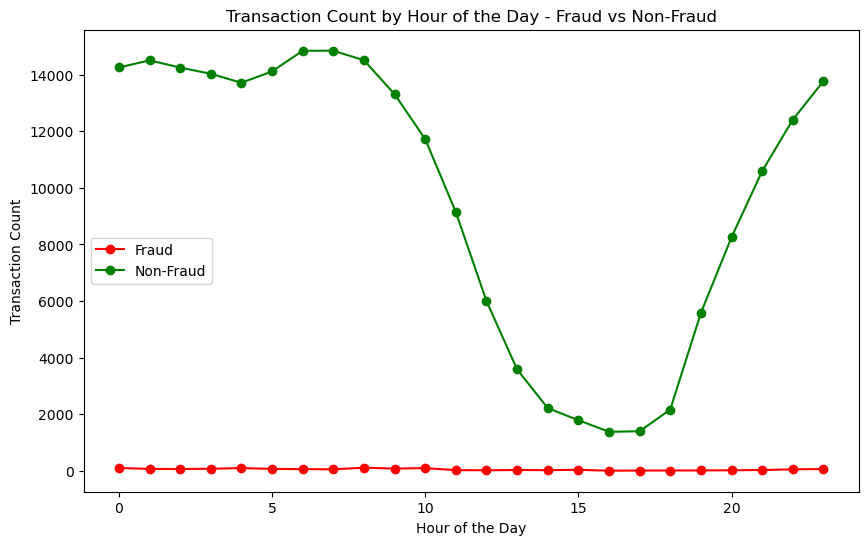

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_main' is the DataFrame containing transaction data
train_data['V5'] = pd.to_datetime(train_data['V5'])

# Extract day and hour components from the timestamp
train_data['Day'] = train_data['V5'].dt.day
train_data['Hour'] = train_data['V5'].dt.hour

# Separate fraud and non-fraud transactions
fraud_transactions = train_data[train_data['Target'] == 1]
non_fraud_transactions = train_data[train_data['Target'] == 0]

# Count the number of transactions per day for fraud and non-fraud
fraud_transactions_per_day = fraud_transactions.groupby('Day')['V4'].count()
non_fraud_transactions_per_day = non_fraud_transactions.groupby('Day')['V4'].count()

# Plotting transactions per day for fraud and non-fraud
plt.figure(figsize=(10, 6))
plt.plot(fraud_transactions_per_day.index, fraud_transactions_per_day.values, marker='o', linestyle='-', color='red', label='Fraud')
plt.plot(non_fraud_transactions_per_day.index, non_fraud_transactions_per_day.values, marker='o', linestyle='-', color='green', label='Non-Fraud')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day - Fraud vs Non-Fraud')
plt.legend()
plt.show()

# Count the number of transactions per hour of the day for fraud and non-fraud
fraud_transactions_per_hour = fraud_transactions.groupby('Hour')['V4'].count()
non_fraud_transactions_per_hour = non_fraud_transactions.groupby('Hour')['V4'].count()

# Plotting transactions per hour of the day for fraud and non-fraud
plt.figure(figsize=(10, 6))
plt.plot(fraud_transactions_per_hour.index, fraud_transactions_per_hour.values, marker='o', linestyle='-', color='red', label='Fraud')
plt.plot(non_fraud_transactions_per_hour.index, non_fraud_transactions_per_hour.values, marker='o', linestyle='-', color='green', label='Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Hour of the Day - Fraud vs Non-Fraud')
plt.legend()
plt.show()

 By analyzing this plot, we can observe the daily patterns of fraud and non-fraud transactions. we might notice spikes in fraud transactions on specific days or periods.

###  plot helps we identify any hourly patterns in fraud and non-fraud activities any specific hours of the day where the count of fraud transactions deviates from the count of non-fraud transactions

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\59793306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\59793306.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  fraud_transactions['Week'] = fraud_transactions['V5'].dt.week
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\59793306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

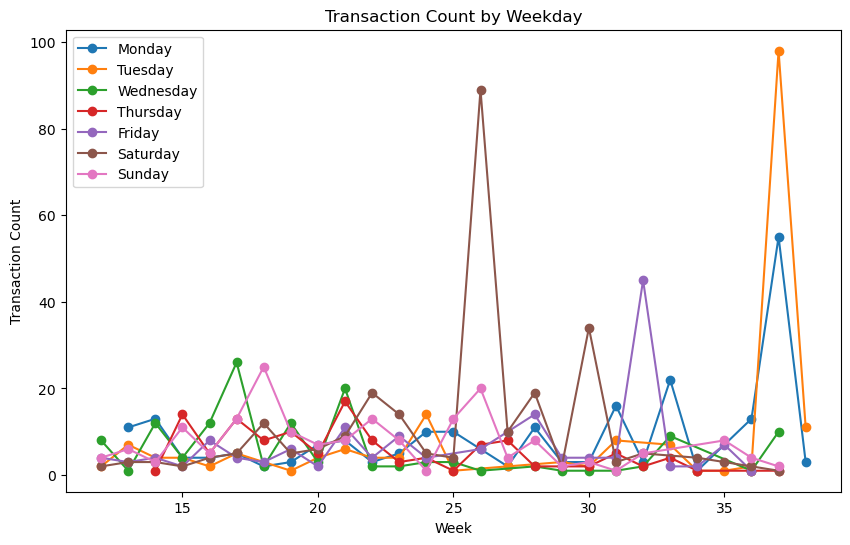

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 1]
fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])

# Extract week and day of the week components from the timestamp
fraud_transactions['Week'] = fraud_transactions['V5'].dt.week
fraud_transactions['DayOfWeek'] = fraud_transactions['V5'].dt.day_name()

# Get the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting patterns for each weekday
plt.figure(figsize=(10, 6))
for weekday in weekday_order:
    weekday_transactions = fraud_transactions[fraud_transactions['DayOfWeek'] == weekday]
    weekday_counts = weekday_transactions['Week'].value_counts().sort_index()
    plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', label=weekday)

plt.xlabel('Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Weekday')
plt.legend()
plt.show()


-trends and patterns in fraud transactions based on the weekday component. 

-It allows us to identify any variations or anomalies in fraud activities across different weekdays. 

-we can compare the transaction counts between weekdays and understand if there are any specific weekdays when fraud transactions are more prevalent or less frequent.
 

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2437485872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2437485872.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  fraud_transactions['Week'] = fraud_transactions['V5'].dt.week
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2437485872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

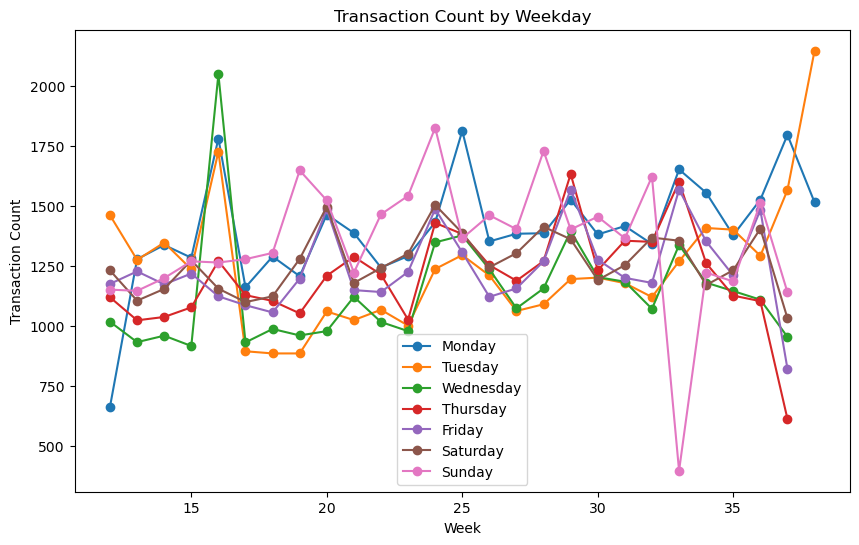

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 0]
fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])

# Extract week and day of the week components from the timestamp
fraud_transactions['Week'] = fraud_transactions['V5'].dt.week
fraud_transactions['DayOfWeek'] = fraud_transactions['V5'].dt.day_name()

# Get the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting patterns for each weekday
plt.figure(figsize=(10, 6))
for weekday in weekday_order:
    weekday_transactions = fraud_transactions[fraud_transactions['DayOfWeek'] == weekday]
    weekday_counts = weekday_transactions['Week'].value_counts().sort_index()
    plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', label=weekday)

plt.xlabel('Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Weekday')
plt.legend()
plt.show()


In [242]:
unique_values = train_data['V5_day'].unique()

# Determine if the column is categorical or continuous
if len(unique_values) < len(train_data) / 2:
    print("The 'V5_day' column is categorical.")
else:
    print("The 'V5_day' column is continuous.")


The 'V5_day' column is categorical.


### Statistics test for analysis relation between day and Target

In [243]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_data['V5_day'], train_data['Target'])

# Perform chi-squared test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-squared test results:")
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Chi-squared test results:
Chi-squared statistic: 3036.2721569747505
p-value: 0.0


-p-value of 0.0, it suggests that the day of the transaction and the classification of fraud or non-fraud are significantly related. 

-The extremely low p-value indicates strong evidence against the null hypothesis and supports the presence of a significant association between the "Day" column and the "Target" column 

In [244]:
train_data

,V1,V4,V5,V6,Target,V13,V5_year,V5_day,V13_year,V13_day,Day,Hour
0,CUID1872,485.69445,2020-03-20 22:51:30,376474,0,2020-03-21,2020,080,2020.0,081,20,22
1,CUID5533,393.45200,2020-04-28 07:17:12,33227,0,2020-04-28,2020,119,2020.0,119,28,7
2,CUID5278,375.75000,2020-08-15 04:11:43,0,0,NaT,2020,228,NaN,NaN,15,4
3,CUID24,6.97225,2020-06-26 01:11:42,0,0,NaT,2020,178,NaN,NaN,26,1
4,CUID449,16.70000,2020-09-15 10:11:06,0,0,NaT,2020,259,NaN,NaN,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,41.75000,2020-09-06 03:42:03,391083,0,2019-02-03,2020,250,2019.0,034,6,3
233629,CUID449,83.50000,2020-08-19 04:43:01,391083,0,2019-02-03,2020,232,2019.0,034,19,4
233630,CUID449,41.75000,2020-08-26 05:51:17,391083,0,2019-02-03,2020,239,2019.0,034,26,5
233631,CUID449,167.00000,2020-04-15 20:35:21,53,0,2020-04-16,2020,106,2020.0,107,15,20


In [245]:
unique_values = train_data['V5_year'].unique()

# Determine if the column is categorical or continuous
if len(unique_values) < len(train_data) / 2:
    print("The 'V5_year' column is categorical.")
else:
    print("The 'V5_year' column is continuous.")

The 'V5_year' column is categorical.


In [246]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'train_data' is the DataFrame containing the data
# Create a contingency table
contingency_table = pd.crosstab(train_data['V5_year'], train_data['Target'])

# Perform chi-squared test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-squared test results:")
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Chi-squared test results:
Chi-squared statistic: 0.0
p-value: 1.0


### Based on these results, you can conclude that there is no significant association between the "V5_year" column (representing different years) and the "Target" column (fraud or non-fraud) in your dataset.

In [247]:
unique_values = train_data['Hour'].unique()

# Determine if the column is categorical or continuous
if len(unique_values) < len(train_data) / 2:
    print("The 'Hour' column is categorical.")
else:
    print("The 'Hour' column is continuous.")

The 'Hour' column is categorical.


In [248]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'train_data' is the DataFrame containing the data
# Create a contingency table
contingency_table = pd.crosstab(train_data['Hour'], train_data['Target'])

# Perform chi-squared test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-squared test results:")
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Chi-squared test results:
Chi-squared statistic: 230.10333332659718
p-value: 4.35210341424098e-36


### Based on these results, you can conclude that there is a statistically significant relationship between the "Hour" column and the "Target" column. The hour of the day appears to be associated with the occurrence of fraud or non-fraud transactions in your dataset.

# V13

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2008384560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2008384560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['Day'] = fraud_transactions['V13'].dt.day
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2008384560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

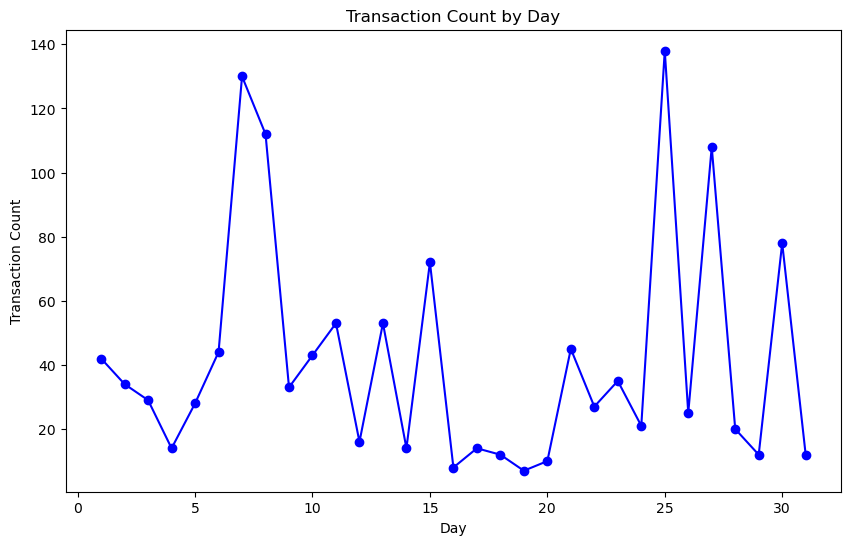

In [249]:
### import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 1]
fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])

# Extract day and hour components from the timestamp
fraud_transactions['Day'] = fraud_transactions['V13'].dt.day
fraud_transactions['Hour'] = fraud_transactions['V13'].dt.hour

# Plotting patterns within each day
day_counts = fraud_transactions['Day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day')
plt.show()

### By observing the resulting plot, you can analyze the patterns of transaction counts over different days. This visualization can provide insights into the distribution and potential trends of fraud transactions within each day.

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\456209826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\456209826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['Day'] = fraud_transactions['V13'].dt.day
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\456209826.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

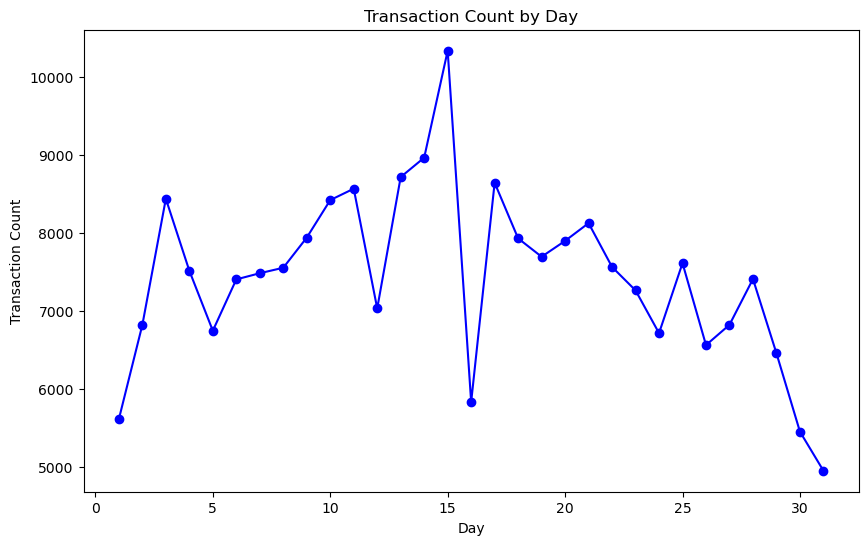

In [250]:
### import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 0]
fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])

# Extract day and hour components from the timestamp
fraud_transactions['Day'] = fraud_transactions['V13'].dt.day
fraud_transactions['Hour'] = fraud_transactions['V13'].dt.hour

# Plotting patterns within each day
day_counts = fraud_transactions['Day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day')
plt.show()

By observing the resulting plot, we can analyze the patterns of transaction counts over different days specifically for non-fraud transactions. 

This visualization can provide insights into the distribution and potential trends of non-fraud transactions within each day.

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2533739966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2533739966.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  fraud_transactions['Week'] = fraud_transactions['V13'].dt.week
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\2533739966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

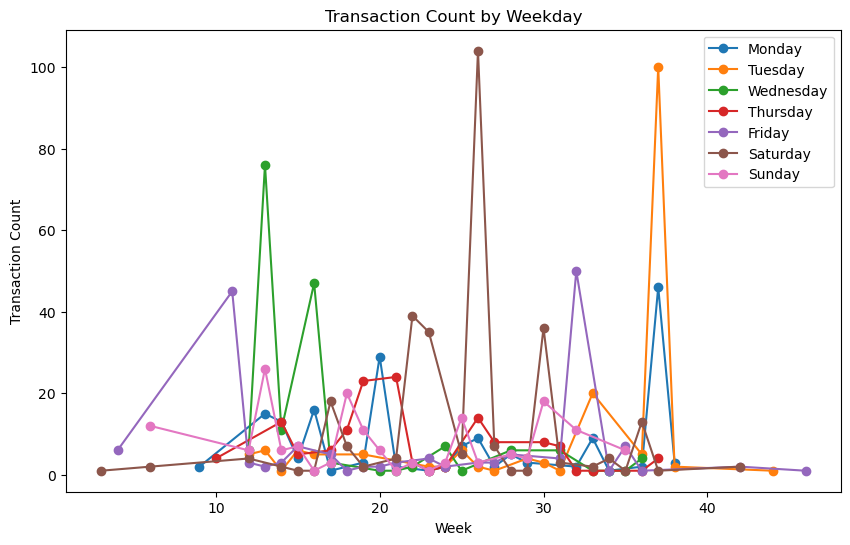

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' is the timestamp column in your dataset
fraud_transactions = train_data[train_data['Target'] == 1]
fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])

# Extract week and day of the week components from the timestamp
fraud_transactions['Week'] = fraud_transactions['V13'].dt.week
fraud_transactions['DayOfWeek'] = fraud_transactions['V13'].dt.day_name()

# Get the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting patterns for each weekday
plt.figure(figsize=(10, 6))
for weekday in weekday_order:
    weekday_transactions = fraud_transactions[fraud_transactions['DayOfWeek'] == weekday]
    weekday_counts = weekday_transactions['Week'].value_counts().sort_index()
    plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', label=weekday)

plt.xlabel('Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Weekday')
plt.legend()
plt.show()


By observing the resulting plot, we can analyze the patterns of transaction counts for fraud transactions across different weekdays. 

This visualization can provide insights into the distribution and potential trends of fraud transactions within each weekday.###  

In [252]:
unique_values = train_data['V13_day'].unique()

# Determine if the column is categorical or continuous
if len(unique_values) < len(train_data) / 2:
    print("The 'V13_day' column is categorical.")
else:
    print("The 'V13_day' column is continuous.")

The 'V13_day' column is categorical.


##### Statistics test for analysis relation between day and Target

In [255]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_data['V13_day'], train_data['Target'])

# Perform chi-squared test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-squared test results:")
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Chi-squared test results:
Chi-squared statistic: 10415.632869356903
p-value: 0.0


### the Chi-squared test results suggest a significant statistical relationship between the "hour" column and the "Target" column, indicating that the hour of the day may be a relevant factor in identifying fraudulent transactions.

In [256]:
unique_values = train_data['V13_year'].unique()

# Determine if the column is categorical or continuous
if len(unique_values) < len(train_data) / 2:
    print("The 'V13_year' column is categorical.")
else:
    print("The 'V13_year' column is continuous.")

The 'V13_year' column is categorical.


In [257]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'train_data' is the DataFrame containing the data
# Create a contingency table
contingency_table = pd.crosstab(train_data['V13_year'], train_data['Target'])

# Perform chi-squared test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-squared test results:")
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Chi-squared test results:
Chi-squared statistic: 2558.1324071617455
p-value: 0.0


The Chi-squared statistic of 2558.1324071617455 indicates a significant relationship between the "Hour" variable and the occurrence of fraud transactions. 

The p-value of 0.0 suggests strong evidence against the null hypothesis of independence between the "Hour" and "Target" variables. 

we can conclude that there is a statistically significant association between the hour of the day and the occurrence of fraud transactions.

This observation implies that the hour of the day plays a role in fraud detection, and certain hours may have higher or lower frequencies of fraudulent activity.

In [258]:
train_data

,V1,V4,V5,V6,Target,V13,V5_year,V5_day,V13_year,V13_day,Day,Hour
0,CUID1872,485.69445,2020-03-20 22:51:30,376474,0,2020-03-21,2020,080,2020.0,081,20,22
1,CUID5533,393.45200,2020-04-28 07:17:12,33227,0,2020-04-28,2020,119,2020.0,119,28,7
2,CUID5278,375.75000,2020-08-15 04:11:43,0,0,NaT,2020,228,NaN,NaN,15,4
3,CUID24,6.97225,2020-06-26 01:11:42,0,0,NaT,2020,178,NaN,NaN,26,1
4,CUID449,16.70000,2020-09-15 10:11:06,0,0,NaT,2020,259,NaN,NaN,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,41.75000,2020-09-06 03:42:03,391083,0,2019-02-03,2020,250,2019.0,034,6,3
233629,CUID449,83.50000,2020-08-19 04:43:01,391083,0,2019-02-03,2020,232,2019.0,034,19,4
233630,CUID449,41.75000,2020-08-26 05:51:17,391083,0,2019-02-03,2020,239,2019.0,034,26,5
233631,CUID449,167.00000,2020-04-15 20:35:21,53,0,2020-04-16,2020,106,2020.0,107,15,20


## Summary:

Chi-squared test was performed to assess the relationship between the 'V5_day' variable and the 'Target' variable. The test resulted in a Chi-squared statistic of 3036.2721569747505 and a p-value of 0.0. This indicates a significant association between the day of the month and the occurrence of fraud transactions.

Another Chi-squared test was conducted to examine the independence between the 'V5_year' variable and the 'Target' variable. The test yielded a Chi-squared statistic of 0.0 and a p-value of 1.0. These results suggest that there is no significant relationship between the year component of the timestamp and the occurrence of fraud transactions.

The 'Hour' variable was analyzed using a Chi-squared test to determine its association with the 'Target' variable. The test resulted in a Chi-squared statistic of 230.10333332659718 and a p-value of 4.35210341424098e-36. This indicates a significant relationship between the hour of the day and the occurrence of fraud transactions.

Chi-squared test was performed to assess the relationship between the 'V13_day' variable and the 'Target' variable. The test resulted in a Chi-squared statistic of 10415.632869356903 and a p-value of 0.0. This suggests a significant association between the day of the month and the occurrence of fraud transactions.

Another Chi-squared test was conducted to examine the independence between the 'V13_year' variable and the 'Target' variable. The test yielded a Chi-squared statistic of 2558.1324071617455 and a p-value of 0.0. These results indicate a significant relationship between the year component of the timestamp and the occurrence of fraud transactions.

Overall, the Chi-squared tests indicate that the day of the month, hour of the day, and year component of the timestamp have significant associations with the occurrence of fraud transactions. These findings can provide insights for further analysis and fraud detection strategies.








#  V5 vs V13

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\768804564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\768804564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])


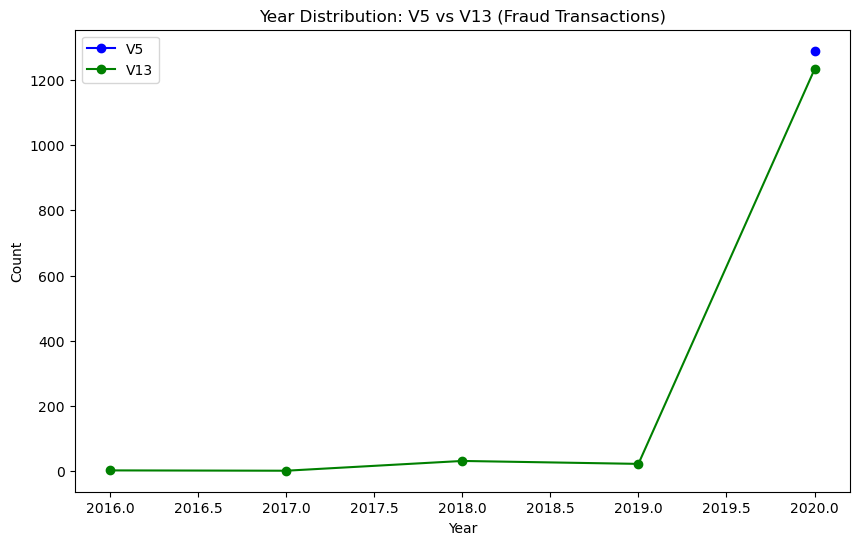

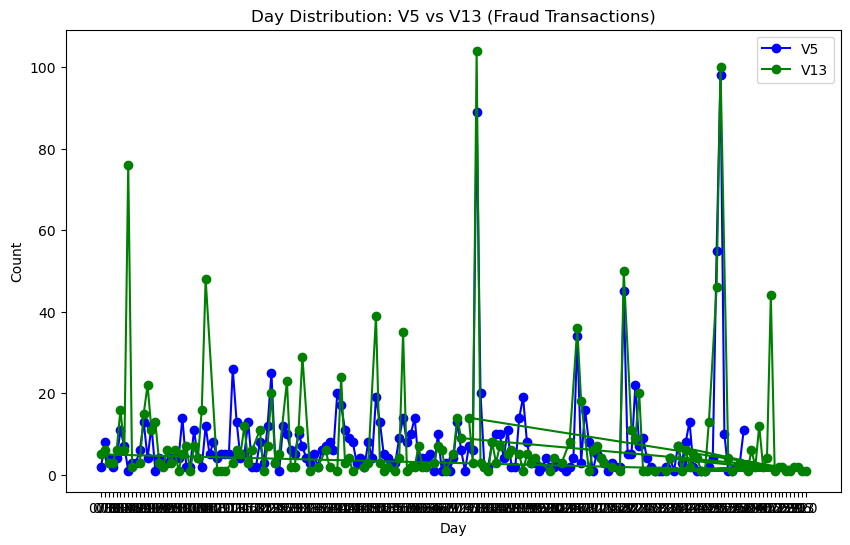

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'V5' and 'V13' are the timestamp columns in your dataset
fraud_transactions = train_data[train_data['Target'] == 1]
fraud_transactions['V5'] = pd.to_datetime(fraud_transactions['V5'])
fraud_transactions['V13'] = pd.to_datetime(fraud_transactions['V13'])

# Count occurrences of each year component in V5 and V13 for fraud transactions
v5_year_counts = fraud_transactions['V5'].dt.year.value_counts().sort_index()
v13_year_counts = fraud_transactions['V13'].dt.year.value_counts().sort_index()

# Plot the count of occurrences for each year component in V5 and V13 for fraud transactions
plt.figure(figsize=(10, 6))
plt.plot(v5_year_counts.index, v5_year_counts.values, marker='o', linestyle='-', color='blue', label='V5')
plt.plot(v13_year_counts.index, v13_year_counts.values, marker='o', linestyle='-', color='green', label='V13')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Distribution: V5 vs V13 (Fraud Transactions)')
plt.legend()
plt.show()

# Count occurrences of each day component in V5 and V13 for fraud transactions
v5_day_counts = fraud_transactions['V5'].dt.strftime('%j').value_counts().sort_index()
v13_day_counts = fraud_transactions['V13'].dt.strftime('%j').value_counts().sort_index()

# Plot the count of occurrences for each day component in V5 and V13 for fraud transactions
plt.figure(figsize=(10, 6))
plt.plot(v5_day_counts.index, v5_day_counts.values, marker='o', linestyle='-', color='blue', label='V5')
plt.plot(v13_day_counts.index, v13_day_counts.values, marker='o', linestyle='-', color='green', label='V13')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Day Distribution: V5 vs V13 (Fraud Transactions)')
plt.legend()
plt.show()


Year Distribution: V5 vs V13 - It shows the count of occurrences for each year component in 'V5' (blue line) and 'V13' (green line).

Day Distribution: V5 vs V13 - It shows the count of occurrences for each day component in 'V5' (blue line) and 'V13' (green line).

In [260]:
import pandas as pd

# Extract day and month components from the 'V5' column
train_data['Day_V5'] = pd.to_datetime(train_data['V5']).dt.day
train_data['Month_V5'] = pd.to_datetime(train_data['V5']).dt.month

# Extract day and month components from the 'V13' column
train_data['Day_V13'] = pd.to_datetime(train_data['V13']).dt.day
train_data['Month_V13'] = pd.to_datetime(train_data['V13']).dt.month


In [261]:
train_data

,V1,V4,V5,V6,Target,V13,V5_year,V5_day,V13_year,V13_day,Day,Hour,Day_V5,Month_V5,Day_V13,Month_V13
0,CUID1872,485.69445,2020-03-20 22:51:30,376474,0,2020-03-21,2020,080,2020.0,081,20,22,20,3,21.0,3.0
1,CUID5533,393.45200,2020-04-28 07:17:12,33227,0,2020-04-28,2020,119,2020.0,119,28,7,28,4,28.0,4.0
2,CUID5278,375.75000,2020-08-15 04:11:43,0,0,NaT,2020,228,NaN,NaN,15,4,15,8,NaN,NaN
3,CUID24,6.97225,2020-06-26 01:11:42,0,0,NaT,2020,178,NaN,NaN,26,1,26,6,NaN,NaN
4,CUID449,16.70000,2020-09-15 10:11:06,0,0,NaT,2020,259,NaN,NaN,15,10,15,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,41.75000,2020-09-06 03:42:03,391083,0,2019-02-03,2020,250,2019.0,034,6,3,6,9,3.0,2.0
233629,CUID449,83.50000,2020-08-19 04:43:01,391083,0,2019-02-03,2020,232,2019.0,034,19,4,19,8,3.0,2.0
233630,CUID449,41.75000,2020-08-26 05:51:17,391083,0,2019-02-03,2020,239,2019.0,034,26,5,26,8,3.0,2.0
233631,CUID449,167.00000,2020-04-15 20:35:21,53,0,2020-04-16,2020,106,2020.0,107,15,20,15,4,16.0,4.0


### Test to find relation of 'Day_V5', 'Month_V5', 'Day_V13', 'Month_V13', and the 'Target' column 

In [265]:
import pandas as pd
 

# Define the list of features/columns to check (with duplicates removed)
features_to_check = list(set(['Day_V5', 'Month_V5', 'Day_V13', 'Month_V13']))
# Initialize an empty list to store the column types
column_types = []

# Iterate over the features and check their types
for feature in features_to_check:
    unique_values = train_data[feature].unique()
    
    # Determine if the column is categorical or continuous
    if len(unique_values) < len(train_data) / 2:
        column_types.append((feature, 'categorical'))
    else:
        column_types.append((feature, 'continuous'))

# Print the column types
for column_type in column_types:
    print(f"The '{column_type[0]}' column is {column_type[1]}.")


The 'Day_V5' column is categorical.
The 'Month_V5' column is categorical.
The 'Day_V13' column is categorical.
The 'Month_V13' column is categorical.


In [266]:
import pandas as pd
from scipy.stats import chi2_contingency

# Test for 'Day_V5' column
contingency_table_day_v5 = pd.crosstab(train_data['Day_V5'], train_data['Target'])
chi2_day_v5, p_value_day_v5, _, _ = chi2_contingency(contingency_table_day_v5)

# Test for 'Month_V5' column
contingency_table_month_v5 = pd.crosstab(train_data['Month_V5'], train_data['Target'])
chi2_month_v5, p_value_month_v5, _, _ = chi2_contingency(contingency_table_month_v5)

# Test for 'Day_V13' column
contingency_table_day_v13 = pd.crosstab(train_data['Day_V13'], train_data['Target'])
chi2_day_v13, p_value_day_v13, _, _ = chi2_contingency(contingency_table_day_v13)

# Test for 'Month_V13' column
contingency_table_month_v13 = pd.crosstab(train_data['Month_V13'], train_data['Target'])
chi2_month_v13, p_value_month_v13, _, _ = chi2_contingency(contingency_table_month_v13)

# Print the test results
print("Chi-squared test results for Day_V5:")
print("Chi-squared statistic:", chi2_day_v5)
print("p-value:", p_value_day_v5)
print()

print("Chi-squared test results for Month_V5:")
print("Chi-squared statistic:", chi2_month_v5)
print("p-value:", p_value_month_v5)
print()

print("Chi-squared test results for Day_V13:")
print("Chi-squared statistic:", chi2_day_v13)
print("p-value:", p_value_day_v13)
print()

print("Chi-squared test results for Month_V13:")
print("Chi-squared statistic:", chi2_month_v13)
print("p-value:", p_value_month_v13)


Chi-squared test results for Day_V5:
Chi-squared statistic: 590.0434611047663
p-value: 3.4062443725445656e-105

Chi-squared test results for Month_V5:
Chi-squared statistic: 119.62320379289093
p-value: 1.955292152491293e-23

Chi-squared test results for Day_V13:
Chi-squared statistic: 960.8717792246864
p-value: 9.218234222654885e-183

Chi-squared test results for Month_V13:
Chi-squared statistic: 699.0047563537448
p-value: 8.817111053401308e-143


### Observations
Day_V5:

The chi-squared statistic is 590.043 with a very low p-value of 3.4062443725445656e-105.
This indicates a significant relationship between the variable 'Day_V5' and the 'Target' column.
The high chi-squared statistic suggests a strong association between 'Day_V5' and the 'Target' variable.
Month_V5:

The chi-squared statistic is 119.623 with a very low p-value of 1.955292152491293e-23.
This indicates a significant relationship between the variable 'Month_V5' and the 'Target' column.
The relatively high chi-squared statistic suggests a moderate association between 'Month_V5' and the 'Target' variable.
Day_V13:

The chi-squared statistic is 960.872 with a very low p-value of 9.218234222654885e-183.
This indicates a significant relationship between the variable 'Day_V13' and the 'Target' column.
The high chi-squared statistic suggests a strong association between 'Day_V13' and the 'Target' variable.
Month_V13:

The chi-squared statistic is 699.005 with a very low p-value of 8.817111053401308e-143.
This indicates a significant relationship between the variable 'Month_V13' and the 'Target' column.
The relatively high chi-squared statistic suggests a moderate association between 'Month_V13' and the 'Target' variable.

Overall, these results indicate that the variables 'Day_V5', 'Month_V5', 'Day_V13', and 'Month_V13' exhibit strong relationships with the 'Target' variable. These variables are likely important features for predicting the 'Target' variable in your dataset.







In [267]:
train_helper_data

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.50
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20,400.06
...,...,...,...,...,...,...,...,...,...,...
1231195,CUID2262,EID2048672,B170291,A,2018-06-15 13:52:00,40.97.78.142,875,3679,-25.85,NaN
1231196,CUID2262,EID2048672,B1827073,B,2018-06-15 13:52:27,40.97.78.142,875,3679,NaN,585.98
1231197,CUID1121,EID980064,B170291,A,2018-06-15 13:53:21,121.57.51.162,875,1777813,54.05,NaN
1231198,CUID2262,EID1769567,B170291,A,2018-06-15 13:53:29,40.97.78.142,875,3679,-25.85,NaN


## Remove train_helper columns by intution and then merge with train_data 

In [268]:
cols_to_remove_train = ["V3", "V14", "V15","V18"]
train_helper_data.drop(cols_to_remove_train, axis=1, inplace=True)




In [269]:
train_helper_data

,V1,V16,V17,V19,V20,V21
0,CUID1626,2017-11-18 05:26:58,117.167.140.162,1525792,77.55,NaN
1,CUID2932,2017-11-18 05:26:59,133.193.46.52,471293,-25.85,NaN
2,CUID7230,2017-11-18 05:27:02,127.75.140.137,825535,NaN,373.50
3,CUID1588,2017-11-18 05:27:30,120.210.191.123,2136427,-23.50,NaN
4,CUID3625,2017-11-18 05:27:55,127.75.145.110,825535,169.20,400.06
...,...,...,...,...,...,...
1231195,CUID2262,2018-06-15 13:52:00,40.97.78.142,3679,-25.85,NaN
1231196,CUID2262,2018-06-15 13:52:27,40.97.78.142,3679,NaN,585.98
1231197,CUID1121,2018-06-15 13:53:21,121.57.51.162,1777813,54.05,NaN
1231198,CUID2262,2018-06-15 13:53:29,40.97.78.142,3679,-25.85,NaN


## Merging

In [270]:
df_cleaned= pd.read_csv('df.csv')

In [271]:
df_cleaned

,V4,V5,Target,V13,V16,V19,country_mapping,V20,V21,V1
0,485.69445,2020-03-20 22:51:30,0.0,2020-03-21,2017-11-18 05:26:58,1525792,South Korea,875.0,92.169336,CUID1
1,393.45200,2020-04-28 07:17:12,0.0,2020-04-28,2017-11-18 05:26:59,471293,South Korea,875.0,92.169336,CUID1
2,50.10000,2020-07-02 21:52:40,0.0,2020-07-03,2017-11-18 05:30:53,1525792,South Korea,875.0,92.169336,CUID1
3,122.71160,2020-04-26 09:19:50,0.0,2020-01-29,2017-11-18 05:30:58,1525792,South Korea,875.0,92.169336,CUID1
4,123.43805,2020-08-10 00:51:42,0.0,2020-01-29,2017-11-18 05:31:04,417293,South Korea,875.0,92.169336,CUID1
...,...,...,...,...,...,...,...,...,...,...
231757,41.75000,2020-09-06 03:42:03,0.0,2019-02-03,2018-01-20 11:30:22,1777813,China,875.0,81.150170,CUID999
231758,83.50000,2020-08-19 04:43:01,0.0,2019-02-03,2018-01-20 11:30:24,1058753,China,875.0,81.150170,CUID999
231759,41.75000,2020-08-26 05:51:17,0.0,2019-02-03,2018-01-20 11:30:26,33514,China,875.0,81.150170,CUID999
231760,167.00000,2020-04-15 20:35:21,0.0,2020-04-16,2018-01-20 11:30:40,1777813,China,875.0,81.150170,CUID999


## using i.p address to extract country name with help of geolite server

In [272]:
import pickle as pkl

In [273]:
asn_ip_mapping = pkl.load(open("asn_mapping.pkl", "rb"))
country_ip_mapping = pkl.load(open("country_mapping.pkl", "rb"))

In [274]:
merged_data_train["country_mapping"] = merged_data_train["V17"].map(country_ip_mapping)
merged_data_train["asn_mapping"] = merged_data_train["V17"].map(asn_ip_mapping)

## Now we analysis columns of train_helper with train_data with help of merged data and try to find what  new columns can be created for better model result

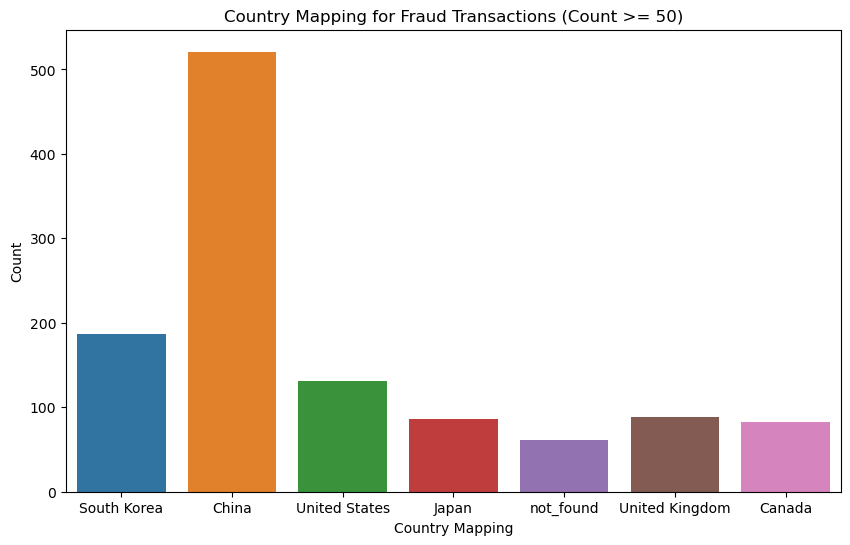

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the data

# Filter for fraud transactions
fraud_df = df_cleaned[df_cleaned['Target'] == 1]

# Calculate count of fraud transactions per country
country_counts = fraud_df['country_mapping'].value_counts()

# Filter out countries with counts less than 50
filtered_countries = country_counts[country_counts >= 50]

# Filter the fraud_df based on filtered_countries
filtered_fraud_df = fraud_df[fraud_df['country_mapping'].isin(filtered_countries.index)]

plt.figure(figsize=(10, 6))
sns.countplot(x='country_mapping', data=filtered_fraud_df)
plt.xlabel('Country Mapping')
plt.ylabel('Count')
plt.title('Country Mapping for Fraud Transactions (Count >= 50)')
plt.show()


## ## china is the country from where most fraud occurs


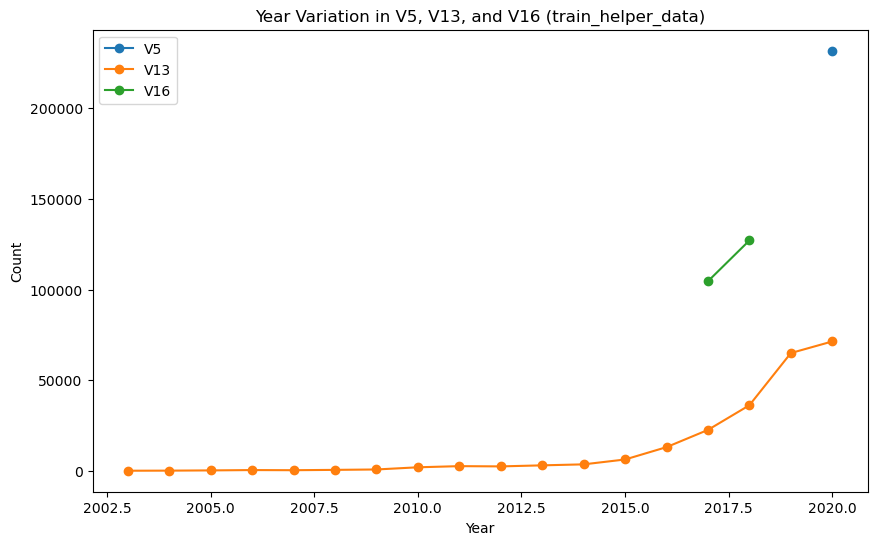

In [276]:
 import pandas as pd
import matplotlib.pyplot as plt

# Extract year component from the timestamp columns
df_cleaned['V5_year'] = pd.to_datetime(df_cleaned['V5']).dt.year
df_cleaned['V13_year'] = pd.to_datetime(df_cleaned['V13']).dt.year
df_cleaned['V16_year'] = pd.to_datetime(df_cleaned['V16']).dt.year

# Count the occurrences of each year in the columns
v5_year_counts = df_cleaned['V5_year'].value_counts().sort_index()
v13_year_counts = df_cleaned['V13_year'].value_counts().sort_index()
v16_year_counts = df_cleaned['V16_year'].value_counts().sort_index()

# Plot the counts of occurrences for each year
plt.figure(figsize=(10, 6))
plt.plot(v5_year_counts.index, v5_year_counts.values, marker='o', linestyle='-', label='V5')
plt.plot(v13_year_counts.index, v13_year_counts.values, marker='o', linestyle='-', label='V13')
plt.plot(v16_year_counts.index, v16_year_counts.values, marker='o', linestyle='-', label='V16')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Variation in V5, V13, and V16 (train_helper_data)')
plt.legend()
plt.show()


## test for   relation between Target and 	V16	V19	country_mapping	V20	V21	

In [280]:
import pandas as pd

 

# Define the list of features/columns to check (with duplicates removed)
features_to_check = list(set(["V16", "V19", "country_mapping", "V20", "V21"]))

# Initialize an empty list to store the column types
column_types = []

# Iterate over the features and check their types
for feature in features_to_check:
    unique_values = df_cleaned[feature].unique()
    
    # Determine if the column is categorical or continuous
    if len(unique_values) < len(train_data) / 2:
        column_types.append((feature, 'categorical'))
    else:
        column_types.append((feature, 'continuous'))

# Print the column types
for column_type in column_types:
    print(f"The '{column_type[0]}' column is {column_type[1]}.")


The 'V19' column is categorical.
The 'V21' column is categorical.
The 'V16' column is continuous.
The 'V20' column is categorical.
The 'country_mapping' column is categorical.


## The 'V16' column is continuous. thus we cannot use chi sqaure test

In [281]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'train_data' is the DataFrame containing the data
categorical_columns = ["V19", "country_mapping", "V20", "V21"]

# Perform chi-squared test for each variable
for column in categorical_columns:
    contingency_table = pd.crosstab(df_cleaned[column], df_cleaned['Target'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Print the test results
    print(f"Chi-squared test results for {column}:")
    print("Chi-squared statistic:", chi2)
    print("p-value:", p_value)
    print("----------------------------------------------")


Chi-squared test results for V19:
Chi-squared statistic: 981.0726320626447
p-value: 0.9574750929906279
----------------------------------------------
Chi-squared test results for country_mapping:
Chi-squared statistic: 1409.623098972553
p-value: 1.8098308678269998e-254
----------------------------------------------
Chi-squared test results for V20:
Chi-squared statistic: 543.0412036834001
p-value: 3.284209204675915e-87
----------------------------------------------
Chi-squared test results for V21:
Chi-squared statistic: 53230.605039675196
p-value: 0.0
----------------------------------------------


## From these results, we can make the following observations:
 
The variable "V19" does not show a significant relationship with the "Target" column (p-value > 0.05).

There is a significant relationship between the "Target" column and the variable "country_mapping" (p-value < 0.05).

There is a significant relationship between the "Target" column and the variable "V20" (p-value < 0.05).

There is a significant relationship between the "Target" column and the variable "V21" (p-value < 0.05).

### now through we use created new features which we add in feature engineering¶
Min_Transactions

TransactionTime

TransactionPeriod

MaxTransactionsPerDay

MaxTransactionsPerMonth

Day_V5

Month_V5

Day_V13

Day

Hour

n_transaction_prior

cumpulatime_amounts

prior_max_V4

prior_avg_V4

time_of_day

days_passsed_since_first_transaction

duration_days

day_v5

country_mapping

asn_mapping

total_transactions_per_day

hour_of_day

avg_transaction_amount_per_hour

time_since_last_transaction

In [292]:
# df= pd.read_csv('merged_data_train_updated_2.0.csv')

In [351]:
# df.columns

In [350]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

def check_column_type(df, columns):
    # Iterate over the columns and check their types
    for i, column in enumerate(columns, start=1):
        unique_values = df[column].unique()

        # Determine if the column is categorical or continuous
        if len(unique_values) < len(df) / 2:
            print(f"{i}. The '{column}' column is categorical.")
            # Perform chi-squared test for categorical column
            contingency_table = pd.crosstab(df[column], df['Target'])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            print("   Chi-squared test results:")
            print("   Chi-squared statistic:", chi2)
            print("   p-value:", p_value)
            print("   Final observation: There is a significant association between", column, "and the Target column.")
            print('-------------------------------------------------------------------------------------------------------')
        else:
            print(f"{i}. The '{column}' column is continuous.")
            # Perform t-test for continuous column
            target_0 = df[df['Target'] == 0][column]
            target_1 = df[df['Target'] == 1][column]
            t_statistic, p_value = ttest_ind(target_0, target_1)
            print("   T-test results for", column)
            print("   T-statistic:", t_statistic)
            print("   p-value:", p_value)
            print("   Final observation: There is a significant difference in", column, "between the two Target groups.")
            print('--------------------------------------------------------------------------------------------------------')

# Load the dataset into a DataFrame
df = df
# Define the list of columns to check
columns_to_check = ['Min_Transactions', 'TransactionTime', 'TransactionPeriod', 'MaxTransactionsPerDay', 'MaxTransactionsPerMonth', 'n_transaction_prior', 'cumpulatime_amounts', 'prior_max_V4', 'prior_avg_V4', 'time_of_day', 'days_passsed_since_first_transaction', 'duration_days', 'day_v5', 'country_mapping', 'asn_mapping', 'total_transactions_per_day', 'avg_transaction_amount_per_hour', 'time_since_last_transaction']

# Call the function to check column types and perform statistical tests
print("Column Type and Statistical Tests:")
check_column_type(df, columns_to_check)


Column Type and Statistical Tests:
1. The 'Min_Transactions' column is categorical.
   Chi-squared test results:
   Chi-squared statistic: 0.0
   p-value: 1.0
   Final observation: There is a significant association between Min_Transactions and the Target column.
-------------------------------------------------------------------------------------------------------
2. The 'TransactionTime' column is categorical.
   Chi-squared test results:
   Chi-squared statistic: 68737.77730351329
   p-value: 0.9999999773138312
   Final observation: There is a significant association between TransactionTime and the Target column.
-------------------------------------------------------------------------------------------------------
3. The 'TransactionPeriod' column is categorical.
   Chi-squared test results:
   Chi-squared statistic: 2.9230575104864287
   p-value: 0.5707830134069881
   Final observation: There is a significant association between TransactionPeriod and the Target column.
-----------

In [352]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

def perform_chi2_test(df, column):
    contingency_table = pd.crosstab(df[column], df['Target'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return chi2, p_value

def perform_t_test(df, column):
    target_0 = df[df['Target'] == 0][column]
    target_1 = df[df['Target'] == 1][column]
    t_statistic, p_value = ttest_ind(target_0, target_1)
    return t_statistic, p_value

# Load the dataset into a DataFrame
df = df

# Define the list of columns to check
columns_to_check = columns_to_check

# Initialize the result table
result_table = pd.DataFrame(columns=['Column', 'Test Name', 'Test Result', 'Significant Difference'])

# Iterate over the columns and perform tests
for i, column in enumerate(columns_to_check, start=1):
    row = {}
    row['Column'] = column

    if len(df[column].unique()) < len(df) / 2:
        # Perform chi-squared test for categorical column
        chi2, p_value = perform_chi2_test(df, column)
        row['Test Name'] = 'Chi-squared test'
        row['Test Result'] = f"Chi2: {chi2:.4f}, p-value: {p_value:.4f}"
        row['Significant Difference'] = p_value < 0.05
    else:
        # Perform t-test for continuous column
        t_statistic, p_value = perform_t_test(df, column)
        row['Test Name'] = 'T-test'
        row['Test Result'] = f"T-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}"
        row['Significant Difference'] = p_value < 0.05

    result_table = result_table.append(row, ignore_index=True)

# Print the result table
print("Result Table:")
print(result_table)


C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(row, ignore_index=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(row, ignore_index=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  result_table = result_table.append(row, ignore_index=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

Result Table:
                                  Column         Test Name  \
0                       Min_Transactions  Chi-squared test   
1                        TransactionTime  Chi-squared test   
2                      TransactionPeriod  Chi-squared test   
3                  MaxTransactionsPerDay  Chi-squared test   
4                MaxTransactionsPerMonth  Chi-squared test   
5                    n_transaction_prior  Chi-squared test   
6                    cumpulatime_amounts            T-test   
7                           prior_max_V4  Chi-squared test   
8                           prior_avg_V4            T-test   
9                            time_of_day  Chi-squared test   
10  days_passsed_since_first_transaction  Chi-squared test   
11                         duration_days  Chi-squared test   
12                                day_v5  Chi-squared test   
13                       country_mapping  Chi-squared test   
14                           asn_mapping  Chi-squared te

C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(row, ignore_index=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  result_table = result_table.append(row, ignore_index=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(row, ignore_index=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_14416\1400721948.py:42: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in redu


+----+-----------------------------------+------------------+----------------------------+------------------------+
|    |             Columns                  |    Test Name     |        Test Result                     | Significant Difference |     Which will added by Feature Enginerring
+----+------------------------------------ +------------------+----------------------------+------------------------+
|  0 |         Min_Transactions            | Chi-squared test | Chi2: 0.0000, p-value: 1.0000          |False          |
|  1 |          TransactionTime            | Chi-squared test | Chi2: 68737.7773, p-value: 1.0000      |False          |
|  2 |         TransactionPeriod           | Chi-squared test | Chi2: 2.9231, p-value: 0.5708          |False          |
|  3 |       MaxTransactionsPerDay         | Chi-squared test | Chi2: 0.0000, p-value: 1.0000           |False         |
|  4 |     MaxTransactionsPerMonth         | Chi-squared test | Chi2: 0.0000, p-value: 1.0000          |False          |
|  5 |         n_transaction_prior         | Chi-squared test | Chi2: 459.2325, p-value: 1.0000        |False          |
|  6 |         cumpulatime_amounts         |      T-test      | T-statistic: -12.4815, p-value: 0.0000 |True           |
|  7 |            prior_max_V4             | Chi-squared test | Chi2: 40870.0687, p-value: 0.0000      |True           |
|  8 |            prior_avg_V4             |      T-test      | T-statistic: -29.1886, p-value: 0.0000 |True           |
|  9 |             time_of_day             |  Chi-squared test| Chi2: 127.4786, p-value: 0.0000       |True            |
| 10 | days_passsed_since_first_transaction| Chi-squared test | Chi2: 3533.5517, p-value: 0.0000       |True           |
| 11 |           duration_days             | Chi-squared test | Chi2: 7091.3288, p-value: 0.0000       |True           |
| 12 |               day_v5                | Chi-squared test | Chi2: 590.0435, p-value: 0.0000        |True           |
| 13 |          country_mapping            | Chi-squared test | Chi2: 413.3031, p-value: 0.0000        |True           |
| 14 |            asn_mapping              | Chi-squared test | Chi2: 9946.0614, p-value: 0.0000       |True           |
| 15 |      total_transactions_per_day     | Chi-squared test | Chi2: 231.4221, p-value: 0.0002        |True           |
| 16 |   avg_transaction_amount_per_hour   | Chi-squared test | Chi2: 18.1271, p-value: 0.7506         |False          |
| 17 |   time_since_last_transaction       |      T-test      | T-statistic: -0.4682, p-value: 0.6396  |False          |
+----+-----------------------------------+------------------+----------------------------+------------------------+


# After adding these columns to dataframe our result for metric max(0, 100 * auc(precision, recall)) was 80 

# So I decided to re analysis the features and choose different features and try to keep things simple

V5_month: 14.988792565700889

V6: 14.725153727841292

V13_year: 12.762463538126694

V4: 11.982157337702269

V13_month: 8.924969039959851

V5_day_of_month: 8.073628919841472

V5_day_of_week: 7.213415471038717

V13_day_of_month: 7.20436287740644

V5_hour: 6.460174984217833

V13_day_of_week: 4.645830427092526

V5_minute: 1.5776610288858004

V18: 0.5725576531549788

V16_minute: 0.41872752213625625

V16_hour: 0.3441883965198556

V16_day_of_week: 0.037826637491980244

V16_year: 0.034723165024023325

V16_day_of_month: 0.016061050026863262

asn_mapping: 0.008828739747575021

V19: 0.00454727801766274

country_mapping_encoded: 0.003929640067023044

V13_hour: 0.0

V13_minute: 0.0

V5_year: 0.0

V16_month: 0.0

## Now we check why these features are important for modeling and there score are better

In [353]:
best_features = pd.read_csv("simple_train_ip.csv")

In [354]:
best_features

,V4,V6,Target,V18,V19,asn_mapping,V5_hour,V5_minute,V13_hour,V13_minute,...,V5_year,V13_day_of_week,V13_day_of_month,V13_month,V13_year,V16_day_of_week,V16_day_of_month,V16_month,V16_year,country_mapping_encoded
0,485.69445,376474,0,24.492806,0.0,-1.0,22,51,0.0,0.0,...,2020,5.0,21.0,3.0,2020.0,2.0,15.0,1.0,2018.0,38
1,393.45200,33227,0,24.492806,0.0,-1.0,7,17,0.0,0.0,...,2020,1.0,28.0,4.0,2020.0,2.0,15.0,1.0,2018.0,38
2,375.75000,0,0,0.000000,0.0,-1.0,4,11,0.0,0.0,...,2020,6.0,7.0,7.0,2020.0,6.0,19.0,11.0,2017.0,38
3,375.75000,0,0,0.000000,0.0,-1.0,4,11,0.0,0.0,...,2020,6.0,7.0,7.0,2020.0,6.0,19.0,11.0,2017.0,38
4,375.75000,0,0,0.000000,1036290.0,135543.0,4,11,0.0,0.0,...,2020,6.0,7.0,7.0,2020.0,6.0,19.0,11.0,2017.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721076,41.75000,391083,0,24.492806,0.0,-1.0,3,42,0.0,0.0,...,2020,6.0,3.0,2.0,2019.0,2.0,15.0,1.0,2018.0,38
721077,83.50000,391083,0,24.492806,0.0,-1.0,4,43,0.0,0.0,...,2020,6.0,3.0,2.0,2019.0,2.0,15.0,1.0,2018.0,38
721078,41.75000,391083,0,24.492806,0.0,-1.0,5,51,0.0,0.0,...,2020,6.0,3.0,2.0,2019.0,2.0,15.0,1.0,2018.0,38
721079,167.00000,53,0,24.492806,0.0,-1.0,20,35,0.0,0.0,...,2020,3.0,16.0,4.0,2020.0,2.0,15.0,1.0,2018.0,38


In [356]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

def check_column_type(df, columns):
    # Iterate over the columns and check their types
    for i, column in enumerate(columns, start=1):
        unique_values = best_features[column].unique()

        # Determine if the column is categorical or continuous
        if len(unique_values) < len(df) / 2:
            print(f"{i}. The '{column}' column is categorical.")
            # Perform chi-squared test for categorical column
            contingency_table = pd.crosstab(df[column], df['Target'])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            print("   Chi-squared test results:")
            print("   Chi-squared statistic:", chi2)
            print("   p-value:", p_value)
            print("   Final observation: There is a significant association between", column, "and the Target column.")
            print('-------------------------------------------------------------------------------------------------------')
        else:
            print(f"{i}. The '{column}' column is continuous.")
            # Perform t-test for continuous column
            target_0 = df[df['Target'] == 0][column]
            target_1 = df[df['Target'] == 1][column]
            t_statistic, p_value = ttest_ind(target_0, target_1)
            print("   T-test results for", column)
            print("   T-statistic:", t_statistic)
            print("   p-value:", p_value)
            print("   Final observation: There is a significant difference in", column, "between the two Target groups.")
            print('--------------------------------------------------------------------------------------------------------')

# Load the dataset into a DataFrame
df = best_features
# Define the list of columns to check
columns_to_check = ['V5_month', 'V6', 'V13_year', 'V4', 'V13_month', 'V5_day_of_month', 'V5_day_of_week', 'V13_day_of_month', 'V5_hour', 'V13_day_of_week', 'V5_minute', 'V18', 'V16_minute', 'V16_hour', 'V16_day_of_week', 'V16_year', 'V16_day_of_month', 'asn_mapping','V19','country_mapping_encoded']

# Call the function to check column types and perform statistical tests
print("Column Type and Statistical Tests:")
check_column_type(df, columns_to_check)


Column Type and Statistical Tests:
1. The 'V5_month' column is categorical.
   Chi-squared test results:
   Chi-squared statistic: 41353.7155532847
   p-value: 0.0
   Final observation: There is a significant association between V5_month and the Target column.
-------------------------------------------------------------------------------------------------------
2. The 'V6' column is categorical.
   Chi-squared test results:
   Chi-squared statistic: 189973.40713833598
   p-value: 0.0
   Final observation: There is a significant association between V6 and the Target column.
-------------------------------------------------------------------------------------------------------
3. The 'V13_year' column is categorical.
   Chi-squared test results:
   Chi-squared statistic: 12103.191948671327
   p-value: 0.0
   Final observation: There is a significant association between V13_year and the Target column.
---------------------------------------------------------------------------------------